Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

Read the Data

In [3]:
df=pd.read_csv("D:\kaggle_project\Diabitece project\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

Missing value

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Heat map

<AxesSubplot: >

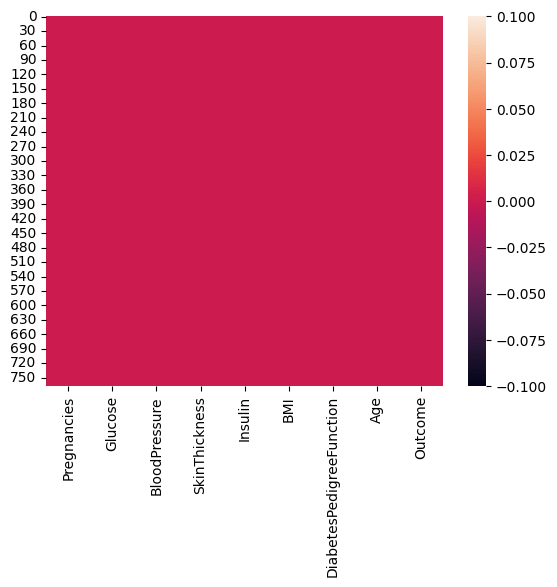

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

EDA

In [11]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

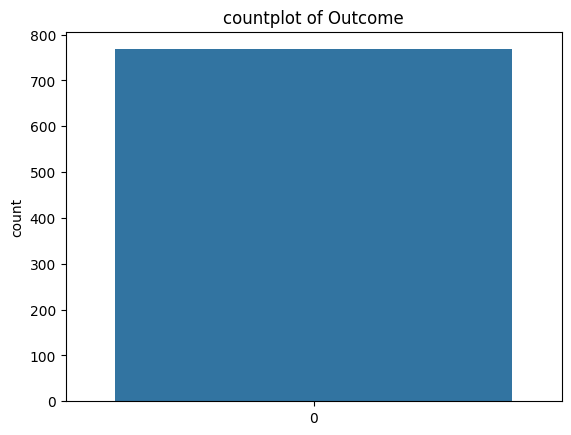

In [12]:
sns.countplot(df.Outcome)
plt.title('countplot of Outcome')
plt.show()

Splitting the data

In [13]:
x=df.loc[:,df.columns!='Outcome']     # only predictors 
y=df.loc[:,df.columns=='Outcome'] 

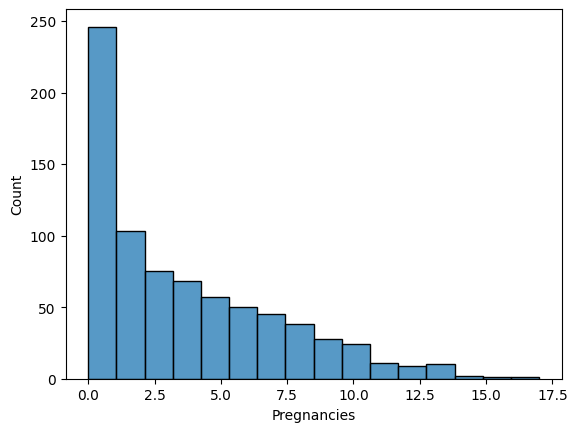

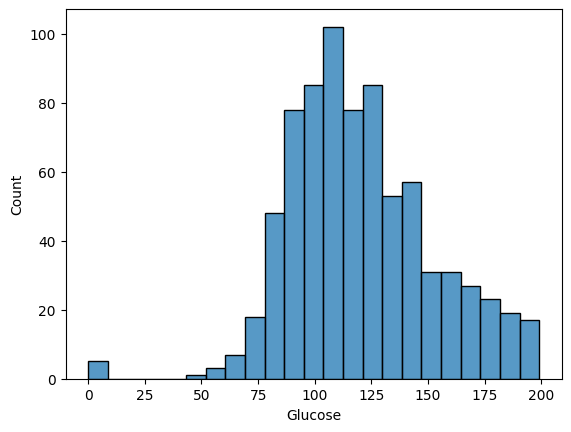

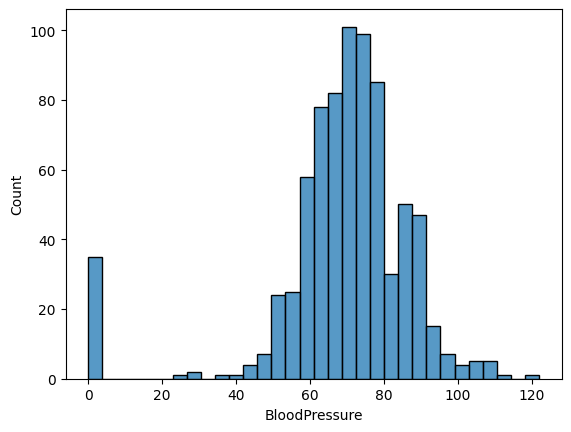

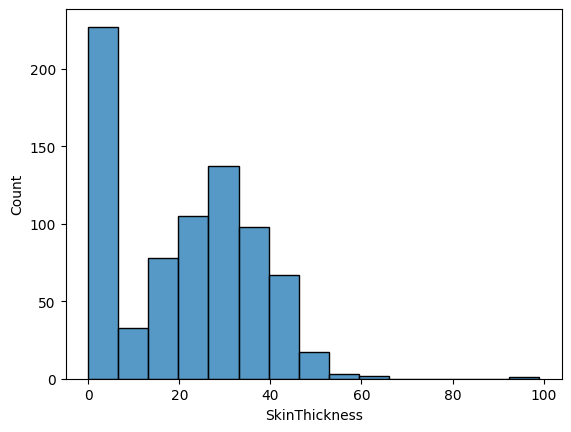

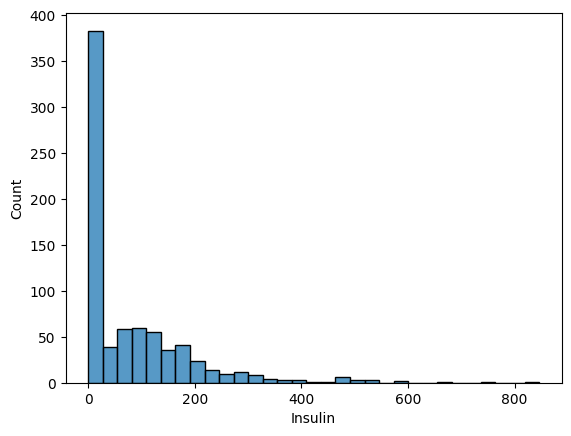

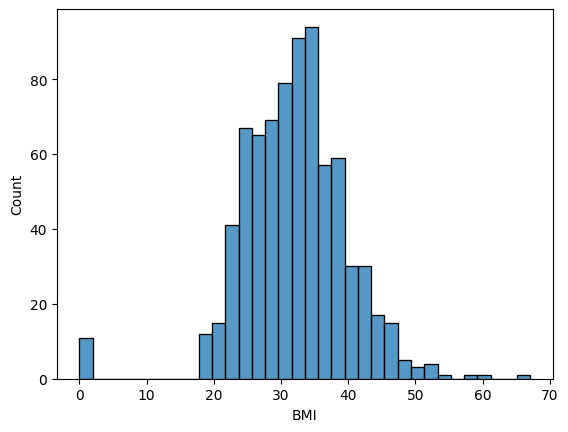

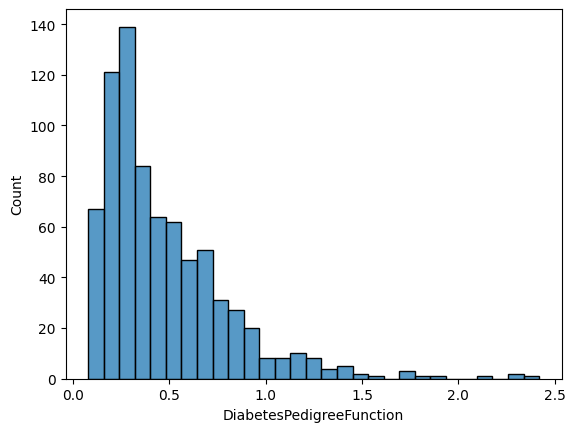

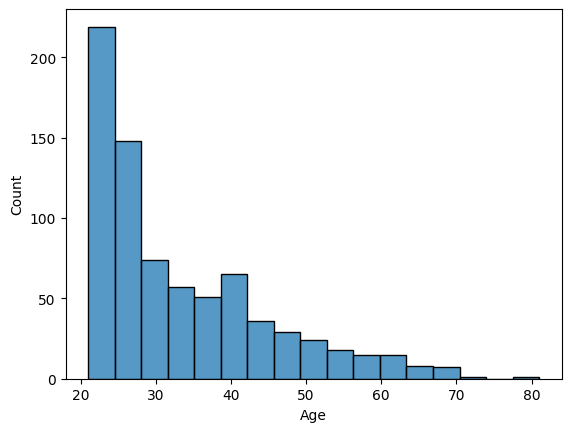

In [14]:
for i in x.columns:
    sns.histplot(df[i])
    plt.show()

Outliers

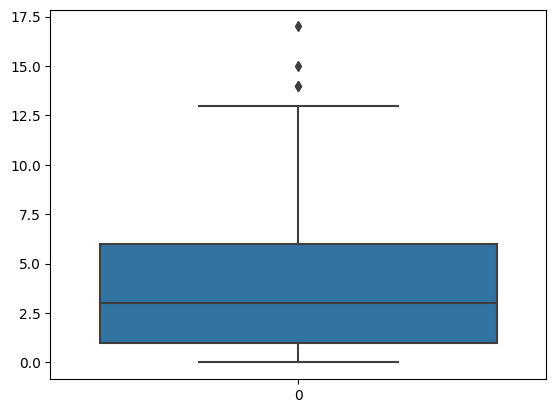

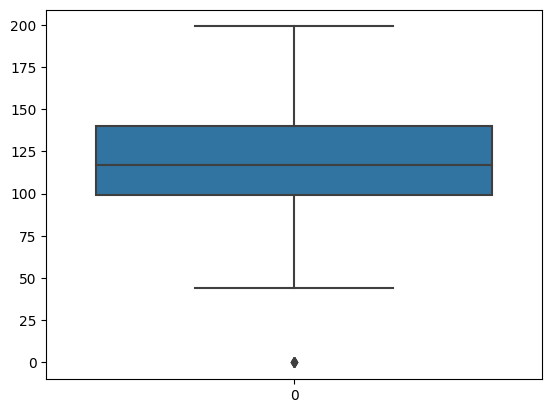

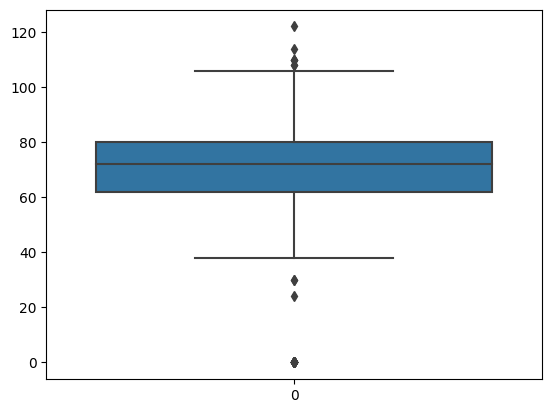

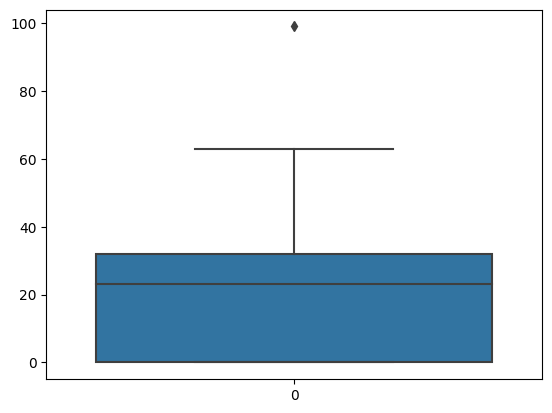

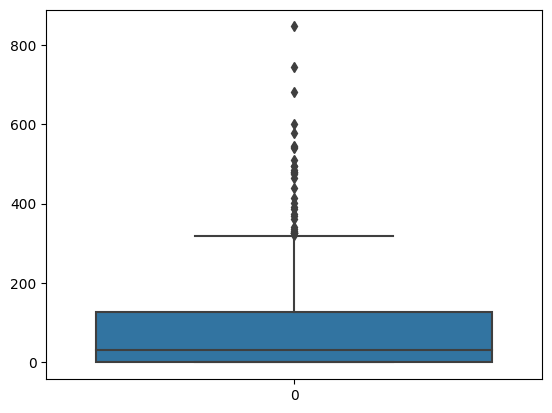

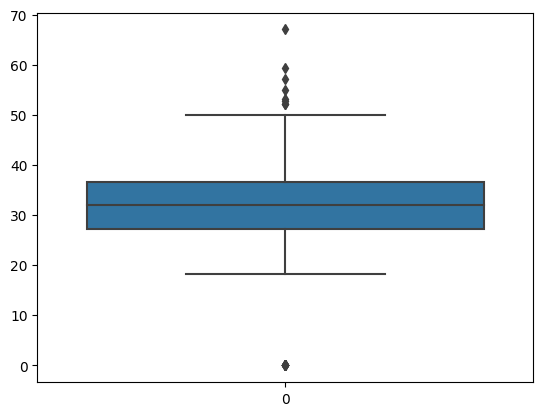

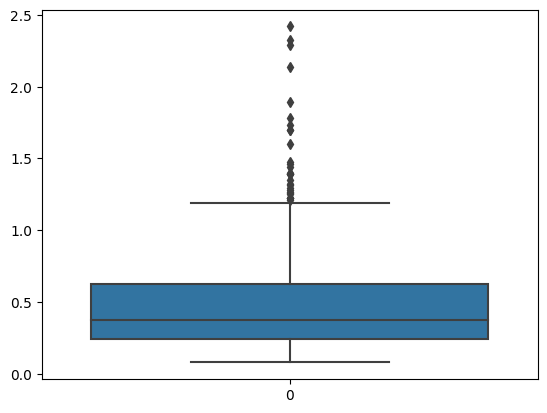

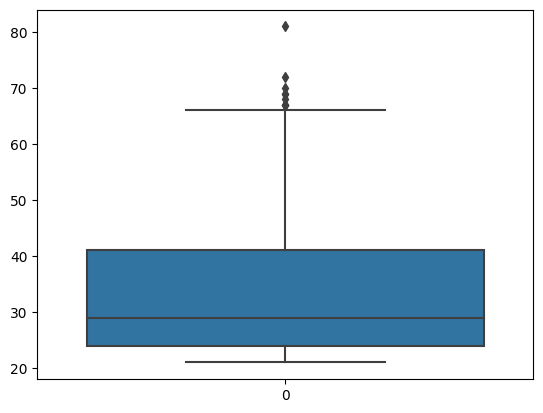

In [15]:
for i in x.columns:
    sns.boxplot(df[i])
    plt.show()

In [16]:
#extreme outlier drop that record
df.drop(579,inplace=True)

<AxesSubplot: >

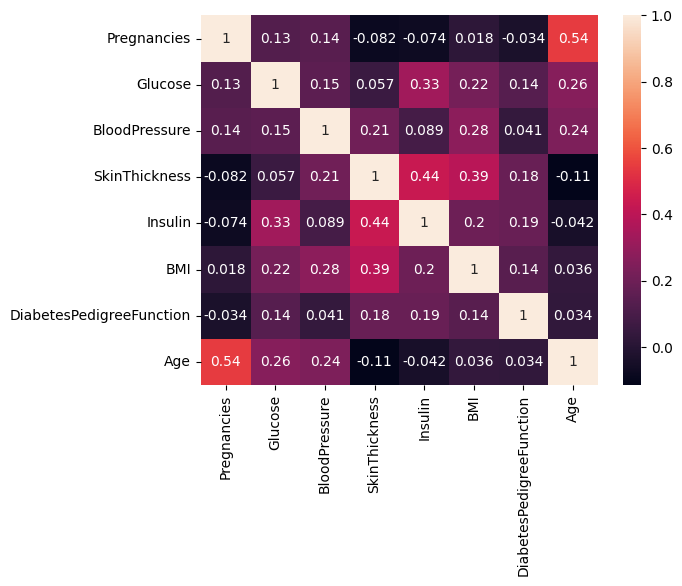

In [17]:
sns.heatmap(x.corr(),annot=True)

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Smote operation

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [23]:
train=pd.concat([x_train,y_train],axis=1)

In [24]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1


In [26]:
not_subsc=train[train.Outcome==0]
print('not_subsc',len(not_subsc))
subsc=train[train.Outcome==1]
print('subsc',len(subsc))

not_subsc 393
subsc 221


In [27]:
from sklearn.utils import resample
subsc_os=resample(subsc,replace=True,n_samples=len(not_subsc),random_state=0)
len(subsc_os)

393

In [28]:
len(subsc_os)

393

In [29]:
train_os=pd.concat([not_subsc,subsc_os])

In [30]:
len(train_os[train_os.Outcome==0])

393

In [31]:
len(train_os[train_os.Outcome==1])

393

In [32]:
train_os.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
97,1,71,48,18,76,20.4,0.323,22,0
530,2,122,60,18,106,29.8,0.717,22,0


In [33]:
x_trainos=train_os.loc[:,train_os.columns!='Outcome']            # only predictors
y_trainos=train_os.loc[:,train_os.columns=='Outcome'] 

Desicion Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier()
DTCFIT=DTC.fit(x_trainos,y_trainos)
DTCFIT

DecisionTreeClassifier()

In [35]:
y_predDTC=DTC.predict(x_test)
y_predDTC

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
as_DTC=accuracy_score(y_test,y_predDTC)
as_DTC

0.7272727272727273

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predDTC))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       107
           1       0.55      0.57      0.56        47

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154



In [38]:
predict_proba_DTC=DTCFIT.predict_proba(x_test)[:,1]

In [39]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_DTC,tpr_DTC,thresholds=metrics.roc_curve(y_test,predict_proba_DTC)

In [40]:
fpr_DTC

array([0.        , 0.20560748, 1.        ])

In [41]:
tpr_DTC

array([0.        , 0.57446809, 1.        ])

In [42]:
auc_DTC=auc(fpr_DTC,tpr_DTC)
auc_DTC

0.6844303042354345

<Figure size 1000x2000 with 0 Axes>

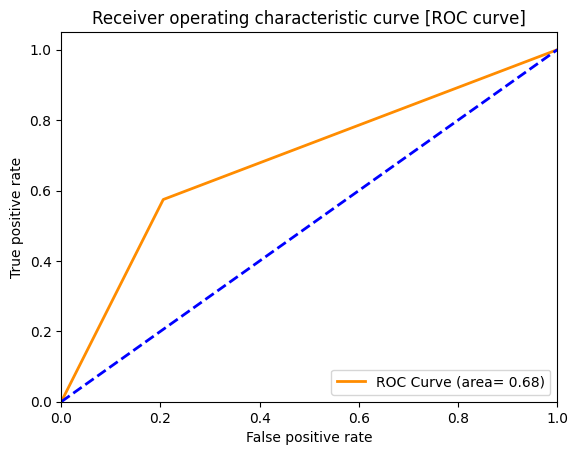

In [43]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fpr_DTC,tpr_DTC,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%auc_DTC)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(max_features='sqrt')
RFCFit=RFC.fit(x_trainos,y_trainos)

In [54]:
RFCFit=RFC.fit(x_train,y_train)
RFCFit

RandomForestClassifier()

In [45]:
y_predRF=RFC.predict(x_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

